In [89]:
!pip install yfinance
# add all installable libs

## Fetching data

In [90]:
import yfinance as yf
import pandas as pd

# Define ticker and date range
ticker = 'ETH-USD'
start_date = '2017-01-01'
end_date = '2024-12-31'

# Download data
eth_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# Reset index to make 'Date' a column
eth_data.reset_index(inplace=True)

# Display the first few rows
print(eth_data.head())

# I tried 2014-2024 first but then I realized that ETH was launched in 2015, so I changed the start date to 2017-01-01.
eth_data.to_csv('eth_usd_2017_2024.csv', index=False)


[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open      Volume
Ticker                ETH-USD     ETH-USD     ETH-USD     ETH-USD     ETH-USD
0      2017-11-09  320.884003  329.451996  307.056000  308.644989   893249984
1      2017-11-10  299.252991  324.717987  294.541992  320.670990   885985984
2      2017-11-11  314.681000  319.453003  298.191986  298.585999   842300992
3      2017-11-12  307.907990  319.153015  298.513000  314.690002  1613479936
4      2017-11-13  316.716003  328.415009  307.024994  307.024994  1041889984


In [91]:
eth_data.shape

(2609, 6)

In [92]:
eth_data.info() 
# no null vals + no cat cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           2609 non-null   datetime64[ns]
 1   (Close, ETH-USD)   2609 non-null   float64       
 2   (High, ETH-USD)    2609 non-null   float64       
 3   (Low, ETH-USD)     2609 non-null   float64       
 4   (Open, ETH-USD)    2609 non-null   float64       
 5   (Volume, ETH-USD)  2609 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 122.4 KB


In [93]:
eth_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
0,2017-11-09,320.884003,329.451996,307.056000,308.644989,893249984
1,2017-11-10,299.252991,324.717987,294.541992,320.670990,885985984
2,2017-11-11,314.681000,319.453003,298.191986,298.585999,842300992
3,2017-11-12,307.907990,319.153015,298.513000,314.690002,1613479936
4,2017-11-13,316.716003,328.415009,307.024994,307.024994,1041889984


In [94]:
eth_data.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
2604,2024-12-26,3331.225830,3512.604492,3302.306396,3493.304199,22247726776
2605,2024-12-27,3328.916992,3436.710693,3302.575684,3331.053711,24091627403
2606,2024-12-28,3397.902344,3419.920166,3318.033936,3328.774658,14305648523
2607,2024-12-29,3349.513428,3406.648438,3321.664795,3397.862549,13440907792
2608,2024-12-30,3356.392578,3428.527344,3298.804443,3349.585938,26981583962


In [95]:
eth_data.describe() 

Price,Date,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
count,2609,2609.000000,2609.000000,2609.000000,2609.000000,2.609000e+03
mean,2021-06-05 00:00:00,1490.773764,1530.573913,1445.274314,1489.776234,1.301809e+10
min,2017-11-09 00:00:00,84.308296,85.342743,82.829887,84.279694,6.217330e+08
25%,2019-08-23 00:00:00,268.704041,274.320831,261.960510,268.692261,5.556444e+09
50%,2021-06-05 00:00:00,1352.837158,1390.589966,1308.991455,1353.205078,1.061841e+10
75%,2023-03-19 00:00:00,2405.181152,2472.187744,2322.337158,2401.256348,1.768550e+10
max,2024-12-30 00:00:00,4812.087402,4891.704590,4718.039062,4810.071289,8.448291e+10
std,NaN,1226.266551,1258.805914,1189.917204,1226.214741,1.059053e+10



* **Time Covered:** This data shows us the price of Ethereum and how much it was traded each day from late 2017 to the end of 2024.
* **How Much Data:** 2600 individual days.
* **Average End-of-Day Price:** If you look at the price of Ethereum at the end of each day, the average over this whole period was about $1490.
* **Price Swing:** The price went as low as about $84 on some days and as high as over $4800 on other days. This shows how much the price of Ethereum could go up or down.
* The **average price** (mean) over all the days is around $1490.
* The **middle price** (median) of all the daily prices is around $1352. This means that for roughly half of the days, the price was below $1352, and for roughly half, it was above.
* **Price Changeability:** The price of Ethereum changed quite a lot day-to-day. The standard deviation of around $1226 tells us that the price often moved significantly away from the average.

In [96]:
eth_data.columns = [col[0] if isinstance(col, tuple) else col for col in eth_data.columns] #converted multiindex to single index for better accessibility/readability <3
eth_data.head()

,Date,Close,High,Low,Open,Volume
0,2017-11-09,320.884003,329.451996,307.056000,308.644989,893249984
1,2017-11-10,299.252991,324.717987,294.541992,320.670990,885985984
2,2017-11-11,314.681000,319.453003,298.191986,298.585999,842300992
3,2017-11-12,307.907990,319.153015,298.513000,314.690002,1613479936
4,2017-11-13,316.716003,328.415009,307.024994,307.024994,1041889984


In [97]:
import plotly.express as px

px.line(eth_data, x=eth_data.index, y='Close', title='Ethereum (ETH/USDT) Daily Closing Price')

at the beginning, closing price was comparitively low, but with the passage of time, the increased and after bull incident 2021, they began to decrease and then started rising again.

In [98]:
px.line(eth_data, x=eth_data.index, y='Volume', title='Ethereum (ETH/USDT) Daily Trading Volume') #daily trade volume is significantly higher than the price, so I used a log scale for better visualization
px.line(eth_data, x=eth_data.index, y='Volume', title='Ethereum (ETH/USDT) Daily Trading Volume').update_yaxes(type="log")

In [99]:
eth_data['MA_30'] = eth_data['Close'].rolling(window=30).mean()
eth_data['MA_90'] = eth_data['Close'].rolling(window=90).mean()

fig = px.line(
    eth_data,
    x='Date',
    y=['Close', 'MA_30', 'MA_90'],
    title='Ethereum (ETH/USDT) Close Price with 30 & 90-Day Moving Averages'
)
fig.show()



   - Despite volatility, there's a strong overall **upward movement** from 2018 to 2024.
   - Especially between **2020 and 2021**, ETH saw explosive growth (likely linked to the bull run).
   - **30-day MA (red)** reacts quickly to price changes and follows the actual 'Close' curve more tightly.
   - **90-day MA (green)** is smoother and lags behind, showing broader trends.
   - **Crossovers** between the 30-day and 90-day MAs can be useful:
     - When **30-day crosses above 90-day**, it often precedes a **bullish trend**.

Lets look for outliers as we have too many peaks(ups and downs)

In [100]:
px.box(eth_data, y='Close', title='Ethereum Closing Price Distribution')

how can there be no outliers, lets try something different, more mathematically:

In [101]:
Q1 = eth_data['Close'].quantile(0.25)
Q3 = eth_data['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = eth_data[(eth_data['Close'] < lower_bound) | (eth_data['Close'] > upper_bound)]

print("Number of outliers detected:", len(outliers))
print("\nOutlier values:")
print(outliers['Close'])

Number of outliers detected: 0

Outlier values:
Series([], Name: Close, dtype: float64)


i dont know why there are zero outliers, lets try one more thing:

In [102]:
import numpy as np
mean_price = eth_data['Close'].mean()
std_price = eth_data['Close'].std()

threshold = 3
outliers_zscore = eth_data[np.abs((eth_data['Close'] - mean_price) / std_price) > threshold]

print("\nNumber of outliers detected using Z-score (threshold = 3):", len(outliers_zscore))
print("\nOutlier values (Z-score):")
print(outliers_zscore['Close'])


Number of outliers detected using Z-score (threshold = 3): 0

Outlier values (Z-score):
Series([], Name: Close, dtype: float64)


Now i get it,while we saw some high peaks in the price chart, statistically, given the entire range of Ethereum's price over those years, those peaks weren't extreme enough to be flagged as outliers by the standard IQR rule or by Z-Score.

# Data Split

In [103]:
# Determine the split point (e.g., 80% for training, 20% for testing)
train_size = int(len(eth_data) * 0.8)
train_data = eth_data[:train_size]
test_data = eth_data[train_size:]

print("Size of training data:", len(train_data))
print("Size of testing data:", len(test_data))

Size of training data: 2087
Size of testing data: 522


In [104]:
import yfinance as yf
import pandas as pd

# Define ticker and date range for 2025
ticker = 'ETH-USD'
start_date = '2025-01-01'
end_date = '2025-04-13'  # Using today's date

# Download data
eth_data_2025 = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# Print the first few rows of the 2025 data
print(eth_data_2025.head())

# Print the last few rows of the 2025 data
print(eth_data_2025.tail())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          ETH-USD      ETH-USD      ETH-USD      ETH-USD      ETH-USD
Date                                                                       
2025-01-01  3353.504150  3366.531494  3310.255859  3332.406494  14195410493
2025-01-02  3451.392578  3493.448242  3348.352051  3353.412109  22243574698
2025-01-03  3605.009766  3627.055664  3421.831543  3451.680908  21877299255
2025-01-04  3657.706787  3669.196777  3574.326904  3605.200684  16060610759
2025-01-05  3634.103760  3673.812988  3594.616943  3657.743164  12830306908
Price             Close         High          Low         Open       Volume
Ticker          ETH-USD      ETH-USD      ETH-USD      ETH-USD      ETH-USD
Date                                                                       
2025-04-08  1472.553101  1617.339844  1447.610107  1554.932129  21315312919
2025-04-09  1668.040039  1687.187988  1386.799316  1472.601440  39252195855
2025-04-10  

In [105]:
# Make sure both DataFrames have a Datetime index named 'Date'
if 'Date' in eth_data_2025.columns:
    eth_data_2025.set_index('Date', inplace=True)

if 'Date' not in test_data.index.names:
    if 'Date' in test_data.columns:
        test_data.set_index('Date', inplace=True)

# Concatenate the test_data and eth_data_2025 DataFrames
merged_test_data = pd.concat([test_data, eth_data_2025])

# Sort the merged data by date to ensure chronological order
merged_test_data.sort_index(inplace=True)
print("Size of training data:", len(train_data))
print("Size of testing data:", len(merged_test_data))

Size of training data: 2087
Size of testing data: 624


I'm working with time series project for the first time, so I looked up from some resources and they suggested to do adf test, as non stationary data violates ARIMA model predictions, so lets start by discovering it first:

The **ADF test** is a **statistical test used to check if a time series is stationary**.

> **Stationarity** means that the **mean, variance, and autocorrelation structure** of the series do **not change over time**.  
> ARIMA models **require** the data to be **stationary** to make reliable predictions.


In [106]:
!pip install statsmodels


In [107]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data['Close'])

result


(-1.4296003366099945,
 0.5680059865988205,
 17,
 2069,
 {'1%': -3.4335145392237445,
  '5%': -2.8629379486479962,
  '10%': -2.5675142037992775},
 23693.06500900226)

Based on the **Augmented Dickey-Fuller (ADF) test** results, we observe the following:

- **ADF Statistic**: -1.4296  
- **p-value**: 0.5680  
- **Number of Lags Used**: 17  
- **Number of Observations Used**: 2069  
- **Critical Values**:
  - 1%: -3.4335  
  - 5%: -2.8629  
  - 10%: -2.5675  

The **p-value (0.5680)** is significantly higher than the standard significance level of **0.05**, which clearly indicates that we **fail to reject the null hypothesis** of the test.

In simpler terms, this means that our time series — **Ethereum’s closing price** — is **not stationary**. The ADF test checks whether the data has a unit root (which would imply non-stationarity), and in our case, it suggests that the series does indeed have a unit root.

Additionally, when comparing the ADF Statistic (-1.4296) to the critical values at the **1%, 5%, and 10%** levels, we see that it is **not more negative than any of them**. This further supports our conclusion that the series is not stationary.

Since **ARIMA models require the time series to be stationary**, this gives us a clear next step: we’ll need to apply a **transformation** — most commonly **differencing** — to make our series stationary before fitting the model.

In [108]:
# Apply first-order differencing to make the series stationary
train_data['Close_diff'] = train_data['Close'].diff()

# Drop the first row with NaN value caused by differencing
train_data = train_data.dropna()


C:\Users\Ash\AppData\Local\Temp\ipykernel_3568\720745891.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(train_data['Close_diff'])
result_diff


(-11.221681242021443,
 2.0062799254716758e-20,
 16,
 1981,
 {'1%': -3.4336552971929506,
  '5%': -2.8630000946528655,
  '10%': -2.5675472932714394},
 22688.435812899526)


### ADF Test Results After Differencing:

- **ADF Statistic**: -11.2231  
- **p-value**: 1.99e-20  
- **Critical Values**:  
  - 1%: -3.4337  
  - 5%: -2.8630  
  - 10%: -2.5675  

Since the ADF statistic is significantly lower than all the critical values and the p-value is far below 0.05, we reject the null hypothesis. This indicates that the differenced series is now stationary.

You can now proceed to fit an ARIMA model.

Our next step will be to plot ACF & PACF plots, but im unfamilar to them too, so lets learn together, what they are and then apply them before fitting the model(ARIMA):

#### 1. **ACF – AutoCorrelation Function**
- **What it does:** ACF shows how much the current value of your time series is related to its **previous values (lags)**.
- **Think of it like:** "How much does today’s price depend on yesterday's, day before yesterday’s, and so on?"
- **Use-case:** Helps in identifying the **MA (q)** part of ARIMA — the number of lagged forecast errors to include in the model.

#### 2. **PACF – Partial AutoCorrelation Function**
- **What it does:** PACF shows the **direct correlation** between the current value and its lag, **after removing the effects of intermediate lags**.
- **Think of it like:** “If I already know yesterday’s and the day before yesterday’s influence, how much more does 3 days ago matter?”
- **Use-case:** Helps in identifying the **AR (p)** part of ARIMA — the number of lagged actual observations to include.

When we'll be building an ARIMA model, we need to figure out the values for **p, d, q**:

| Parameter | Meaning                        | Determined by |
|-----------|--------------------------------|---------------|
| `p`       | Autoregressive lag             | PACF plot     |
| `d`       | Differencing (you just did it) | ADF test      |
| `q`       | Moving average lag             | ACF plot      |

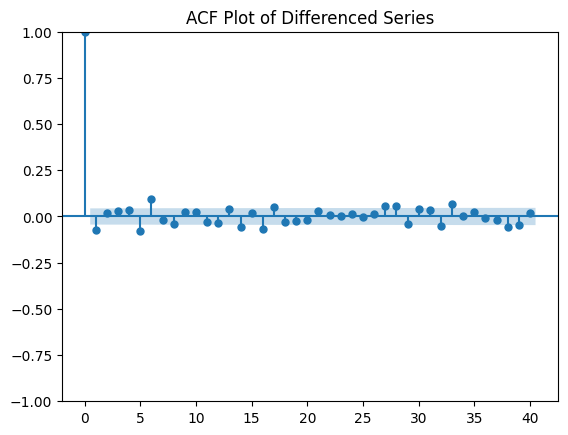

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF plot
plot_acf(train_data['Close_diff'], lags=40)
plt.title("ACF Plot of Differenced Series")
plt.show()




* **Significant Autocorrelation at Lags 1 and 2:** We can see clear spikes extending beyond the blue confidence interval at lag 1 and lag 2. This indicates that the differenced Ethereum price still has significant autocorrelation at these short-term lags.
* **Gradual Decay:** After lag 2, the autocorrelation seems to decrease relatively quickly, with most of the subsequent lags falling within or very close to the confidence interval.
* **No Long-Term Persistence:** The ACF doesn't show a slow, gradual decay over many lags, which is good. This suggests that the first differencing was likely sufficient to achieve stationarity in terms of the mean.

**What this suggests for our ARIMA model order:**

* **Potential AR (p) component:** The significant autocorrelation at the initial lags, especially lag 1 and 2, suggests that an autoregressive (AR) component might be needed in our model. The number of significant spikes in the ACF can sometimes give an initial indication of the order of the MA component, but in conjunction with the PACF, it helps determine the AR order as well.
* **Potential MA (q) component:** The fact that the autocorrelation drops off after a few lags could also suggest the need for a moving average (MA) component. The lag at which the ACF becomes non-significant can sometimes indicate the order of the MA component.

**Overall View:**

This ACF plot suggests that an ARIMA model with small values for `p` and `q` (likely around 1 or 2) might be appropriate. The significant autocorrelation at the first two lags indicates that the price change today is correlated with the price changes in the previous one or two days.


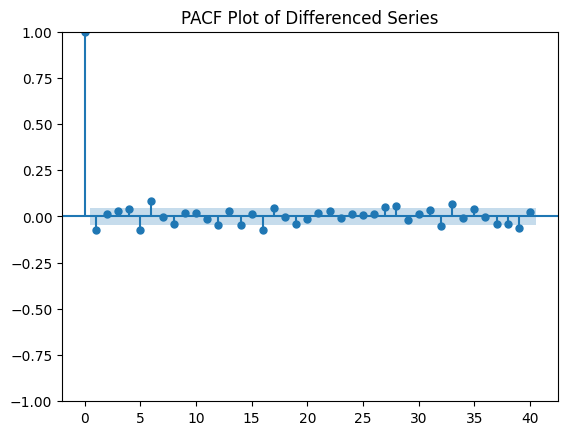

In [111]:
# PACF plot
plot_pacf(train_data['Close_diff'], lags=40, method='ywm')  # 'ywm' handles large data better
plt.title("PACF Plot of Differenced Series")
plt.show()

Okay, I see the Partial Autocorrelation Function (PACF) plot of the differenced series. Let's analyze it:

* **Significant Spike at Lag 1:** The PACF plot shows a very significant spike at lag 1 that extends well beyond the blue confidence interval. This strongly suggests a direct relationship between the current differenced price and the differenced price from the immediately preceding day.
* **No Other Dominant Spikes:** After lag 1, the spikes in the PACF plot are much smaller and mostly fall within the confidence interval. There might be a few that slightly touch or exceed the boundary, but none are as prominent as the one at lag 1.

**What this means for our ARIMA model order:**

The PACF plot is particularly helpful in identifying the order of the autoregressive (AR) component (`p`). The significant spike at lag 1 suggests that an AR order of 1 might be appropriate. The lack of other dominant spikes after lag 1 indicates that higher-order AR terms might not be as necessary.

**In summary:**

Looking at both the ACF and PACF plots of the differenced series:

* **ACF:** Showed significant autocorrelation at lags 1 and 2, with a relatively quick decay afterward. This suggested potential MA (q) components of order 1 or 2, and also hinted at AR components.
* **PACF:** Showed a strong, significant spike only at lag 1, suggesting a primary AR (p) component of order 1.

**Based on these plots, a good starting point for your ARIMA model might be an order of (1, 1, q), where q is likely 0, 1, or possibly 2.** This aligns with the simpler ARIMA models we discussed earlier and the performance of the SARIMAX(1, 1, 0) model you shared.
- but we will use auto_arima...

# Building the first model

In [112]:
from pmdarima import auto_arima

# Assuming you have your training data in a pandas Series called 'train_data['Close']'
# Make sure 'train_data' is a pandas DataFrame and it has a 'Close' column

# Run auto_arima to find the best ARIMA order
model = auto_arima(train_data['Close'], seasonal=True, trace=True,
                     error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model found
print(model.summary())

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23000.603, Time=2.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23005.614, Time=0.12 sec


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22997.623, Time=0.18 sec


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22997.987, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23003.711, Time=0.05 sec


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22999.219, Time=0.30 sec


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22999.396, Time=0.24 sec


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22999.490, Time=1.76 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=22995.735, Time=0.09 sec


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0]             : AIC=22997.329, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=22997.503, Time=0.14 sec


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0]             : AIC=22996.100, Time=0.12 sec


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0]             : AIC=22997.589, Time=0.60 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 6.353 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1998
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -11495.868
Date:                Mon, 14 Apr 2025   AIC                          22995.735
Time:                        17:35:28   BIC                          23006.934
Sample:                             0   HQIC                         22999.847
                               - 1998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0706      0.012     -6.084      0.000      -0.093

Even auto_arima, isnt helping, and the data is also free from outliers, why our model is too messy ;(
- basically this is one of the classic problems of time-series projects, Im using more data thinking that this will train model better, but actually due to the historical trends like bull run and ups and downs of etherum are messing the model up, preventing it to capture trends, i guess i should use less or recent trends as I have to predict fututre trends

In [113]:
from statsmodels.tsa.arima.model import ARIMA

recent_data = train_data['Close'].iloc[-1500:]

model = ARIMA(recent_data, order=(0, 1, 1))
model_fit = model.fit()

# Step 3: Print summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1500
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -8832.324
Date:                Mon, 14 Apr 2025   AIC                          17668.648
Time:                        17:35:28   BIC                          17679.273
Sample:                             0   HQIC                         17672.606
                               - 1500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0683      0.015     -4.452      0.000      -0.098      -0.038
sigma2      7699.6666    102.318     75.252      0.000    7499.127    7900.206
Ljung-Box (L1) (Q):                   0.00   Jarque-

c:\Users\Ash\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\Ash\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\Ash\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



# predicting

Data ranges from 2018-02-06 00:00:00 to 2023-07-27 00:00:00


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Selected model:  ARIMA(1,1,0)(0,0,0)[0]          


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



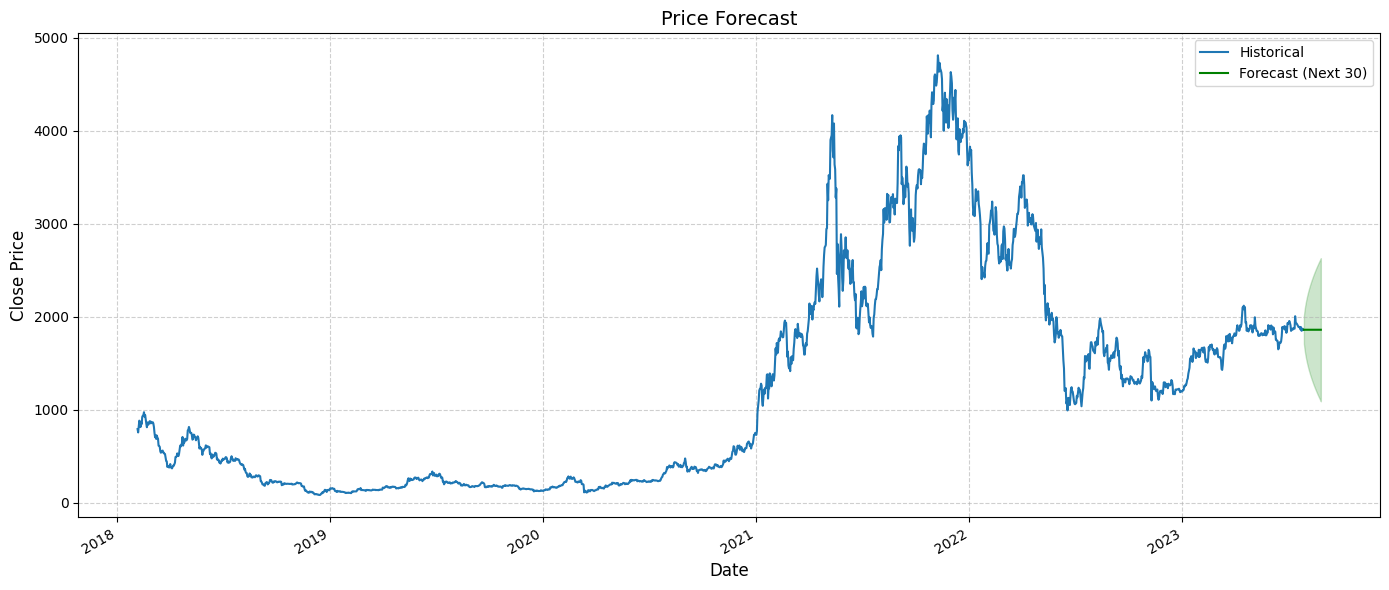

In [115]:
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure train_data has proper datetime index
# If you're loading from a file, make sure to parse dates properly
# train_data = pd.read_csv('your_file.csv', parse_dates=['Date'])
# train_data.set_index('Date', inplace=True)

# Make sure the Date column is properly formatted as datetime
if 'Date' in train_data.columns:
    train_data['Date'] = pd.to_datetime(train_data['Date'])
    train_data.set_index('Date', inplace=True)

# Use 'Close' prices from train_data
df = train_data[['Close']]

# Double-check the index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()  # Ensure chronological order

# Print the date range to confirm proper formatting
print(f"Data ranges from {df.index.min()} to {df.index.max()}")

# Improved auto_arima with better parameters
model = pm.auto_arima(
    df['Close'], 
    seasonal=False,
    stepwise=True,
    max_p=5, max_d=2, max_q=5,  # Allow more complex model parameters
    suppress_warnings=True,
    error_action="ignore"
)

print(f"Selected model: {model}")

# Forecast next 30 days
n_periods = 30
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create forecast index (next 30 days)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# Create DataFrame for plotting
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': conf_int[:, 0],
    'Upper CI': conf_int[:, 1]
}, index=forecast_index)

# Plot with improved formatting
plt.figure(figsize=(14, 6))

# Plot historical data
plt.plot(df.index, df['Close'], label='Historical')

# Plot forecast
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast (Next 30)', color='green')

# Complete the fill_between command that was cut off
plt.fill_between(
    forecast_df.index, 
    forecast_df['Lower CI'], 
    forecast_df['Upper CI'], 
    color='green', 
    alpha=0.2
)

# Fix the 1970 issue by explicitly formatting the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Add grid, labels, and title
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.title('Price Forecast', fontsize=14)

# Ensure date labels are readable
plt.gcf().autofmt_xdate()

# Add legend and show plot
plt.legend()
plt.tight_layout()
plt.show()
